# 第12章 监督学习方法总结


### 1 适用问题

监督学习可以认为是学习一个模型，使它能对给定的输入预测相应的输出。监督学习包括分类、标注、回归。本篇主要考虑前两者的学习方法。

分类问题是从实例的特征向量到类标记的预测问题；标注问题是从观测序列到标记序列(或状态序列)的预测问题。可以认为分类问题是标注问题的特殊情况。
分类问题中可能的预测结果是二类或多类；而标注问题中可能的预测结果是所有的标记序列，其数目是指数级的。
 
感知机、$k$近邻法、朴素贝叶斯法、决策树是简单的分类方法，具有模型直观、方法简单、实现容易等特点；

逻辑斯谛回归与最大熵模型、支持向量机、提升方法是更复杂但更有效的分类方法，往往分类准确率更高；

隐马尔可夫模型、条件随机场是主要的标注方法。通常条件随机场的标注准确率更事高。

### 2 模型

分类问题与标注问题的预测模型都可以认为是表示从输入空间到输出空间的映射.它们可以写成条件概率分布$P(Y|X)$或决策函数$Y=f(X)$的形式。前者表示给定输入条件下输出的概率模型，后者表示输入到输出的非概率模型。

朴素贝叶斯法、隐马尔可夫模型是概率模型；感知机、$k$近邻法、支持向量机、提升方法是非概率模型；而决策树、逻辑斯谛回归与最大熵模型、条件随机场既可以看作是概率模型，又可以看作是非概率模型。

直接学习条件概率分布$P(Y|X)$或决策函数$Y=f(X)$的方法为判别方法，对应的模型是判别模型：感知机、$k$近邻法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、条件随机场是判别方法。

首先学习联合概率分布$P(X,Y)$，从而求得条件概率分布$P(Y|X)$的方法是生成方法，对应的模型是生成模型：朴素贝叶斯法、隐马尔可夫模型是生成方法。

决策树是定义在一般的特征空间上的，可以含有连续变量或离散变量。感知机、支持向量机、k近邻法的特征空间是欧氏空间(更一般地，是希尔伯特空间)。提升方法的模型是弱分类器的线性组合，弱分类器的特征空间就是提升方法模型的特征空间。

感知机模型是线性模型；而逻辑斯谛回归与最大熵模型、条件随机场是对数线性模型；$k$近邻法、决策树、支持向量机(包含核函数)、提升方法使用的是非线性模型。

### 3  学习策略

在二类分类的监督学习中，支持向量机、逻辑斯谛回归与最大熵模型、提升方法各自使用合页损失函数、逻辑斯谛损失函数、指数损失函数，分别写为：

$$
[1-y f(x)]_{+}
$$

$$
\log[1+\exp (-y f(x))]
$$

$$
\exp (-y f(x))
$$

这3种损失函数都是0-1损失函数的上界，具有相似的形状。(见下图，由代码生成）

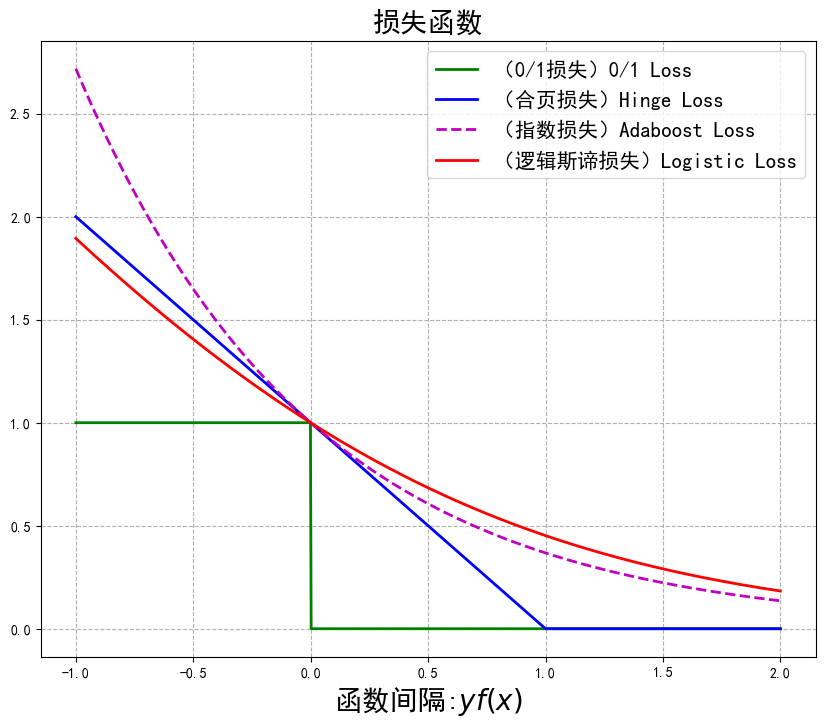

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']        # 用来设置字体样式以正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False          # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号
plt.figure(figsize=(10,8))      # 指定图形的宽和高
x = np.linspace(start=-1, stop=2, num=1001, dtype=float)    # 生成起始点为-1 结束点为2 的 均匀分布的数值序列
logi = np.log(1 + np.exp(-x)) / math.log(2)     # 逻辑斯谛损失
boost = np.exp(-x)          # 指数损失
y_01 = x < 0                # 0/1损失
y_hinge = 1.0 - x           # 合页损失
y_hinge[y_hinge < 0] = 0    # 合页损失

plt.plot(x, y_01, 'g-', mec='k', label='（0/1损失）0/1 Loss', lw=2)             # 绘制0/1损失曲线
plt.plot(x, y_hinge, 'b-', mec='k', label='（合页损失）Hinge Loss', lw=2)       # 绘制合页损失曲线
plt.plot(x, boost, 'm--', mec='k', label='（指数损失）Adaboost Loss', lw=2)     # 绘制指数损失曲线
plt.plot(x, logi, 'r-', mec='k', label='（逻辑斯谛损失）Logistic Loss', lw=2)   # 绘制逻辑斯谛损失曲线
plt.grid(True, ls='--')         # True:显示网格线;ls:linestyle
plt.legend(loc='upper right',fontsize=15)   # 设置图例
plt.xlabel('函数间隔:$yf(x)$',fontsize=20)  # X轴标签
plt.title('损失函数',fontsize=20)           # 设置表标题
plt.show()  # 显示图形

 
可以认为支持向量机、逻辑斯谛回归与最大熵模型、提升方法使用不同的代理损失函数(surrogateloas Punotion)表示分类的损失，定义经验风险或结构风险函数，实现二类分类学习任务。学习的策略是优化以下结构风险函数，

$$
\min _{f \in H} \frac{1}{N} \sum_{i=1}^{N} L\left(y_{i}, f\left(x_{i}\right)\right)+\lambda J(f)
$$

第1项为经验风险(经验损失)，第2项为正则化项，$L(y,f(x))$为损失函数，$J(f)$为模型的复杂度，$\lambda \geq 0$为系数。

支持向量机用$L_2$范数表示模型的复杂度。原始的逻辑斯谛回归与最大熵模型没有正则化项，可以给它们加上$L_2$范数正则化项。提升方法没有显式的正则化项，通常通过早停止(early stopping)的方法达到正则化的效果。
 
概率模型的学习可以形式化为极大似然估计或贝叶斯估计的极大后验概率估计。学习的策略是极小化对数似然损失或极小化正则化的对数似然损失。对数似然损失可以写成：

$$-logP(y|x)$$

极大后验概率估计时，正则化项是先验概率的负对数。

决策树学习的策略是正则化的极大似然估计，损失函数是对数似然损失，正则化项是决策树的复杂度。

逻辑斯谛回归与最大熵模型、条件随机场的学习策略既可以看成是极大似然估计(或正则化的极大似然估计)，又可以看成是极小化逻辑斯谛损失(或正则化的逻辑斯谛损失)。

朴素贝叶斯模型、隐马尔可夫模型的非监督学习也是极大似然估计或极大后验概率估计，但这时模型含有隐变量。

### 4 学习算法

统计学习的问题有了具体的形式以后，就变成了最优化问题。

朴素贝叶斯法与隐马尔可夫模型的监督学习，最优解即极大似然估计值，可以由概率计算公式直接计算。

感知机、逻辑斯谛回归与最大熵模型、条件随机场的学习利用梯度下降法、拟牛顿法等一般的无约束最优化问题的解法。
支持向量机学习，可以解凸二次规划的对偶问题。有序列最小最优化算法等方法。

决策树学习是基于启发式算法的典型例子。可以认为特征选择、生成、剪枝是启发式地进行正则化的极大似然估计。

提升方法利用学习的模型是加法模型、损失函数是指数损失函数的特点，启发式地从前向后逐步学习模型，以达到逼近优化目标函数的目的。

EM算法是一种迭代的求解含隐变量概率模型参数的方法，它的收敛性可以保证，但是不能保证收敛到全局最优。

支持向量机学习、逻辑斯谛回归与最大熵模型学习、条件随机场学习是凸优化问题，全局最优解保证存在。而其他学习问题则不是凸优化问题。

----

本文代码更新地址：https://github.com/fengdu78/lihang-code

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)